# Problem
Menganalisis fakta nutrisi yang terkandung dalam menu McDonald untuk mengetahui kombinasi makanan dan minuman yang sesuai dengan asupan nutrisi yang dibutuhkan oleh tubuh agar tidak berlebihan sehingga cocok dipesan.

# Dataset
Dataset yang dapat didapatkan berisi jenis menu McDonald meliputi breakfast, beef burgers, chicken & fish sandwiches, fries, salads, soda, coffee & tea, milkshakes, dan desserts disertai nutrisi yang tekandung didalamnya. Data tersebut diambil dengan teknik web scraping dari situs US McDonald.

# Questions
- How many calories does the average McDonald's value meal contain?
- How much do beverages, like soda or coffee, contribute to the overall caloric intake?
- Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?
- What about ordering egg whites instead of whole eggs?
- What is the least number of items could you order from the menu to meet one day's nutritional requirements?

# Analysis
Teknik analisis yang digunakan adalah Quantitative/Statistical Analysis

# Data Collection

In [42]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_efaf3a62405d48dcb89c07b4ccade3c0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='eDS36OCofz2VVSnehL8hoKF8eeVWJIjX9waECimgp_GF',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_efaf3a62405d48dcb89c07b4ccade3c0.get_object(Bucket='nutritionmenumcdonald-donotdelete-pr-iwyluuf8reo0qx',Key='mcd_menu.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


In [43]:
# load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [44]:
# baca data menu
menu = pd.read_csv(body)

# top 5 rows
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [45]:
# cek info data
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [112]:
menu.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

# Data Exploration

In [46]:
# describe data
menu.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


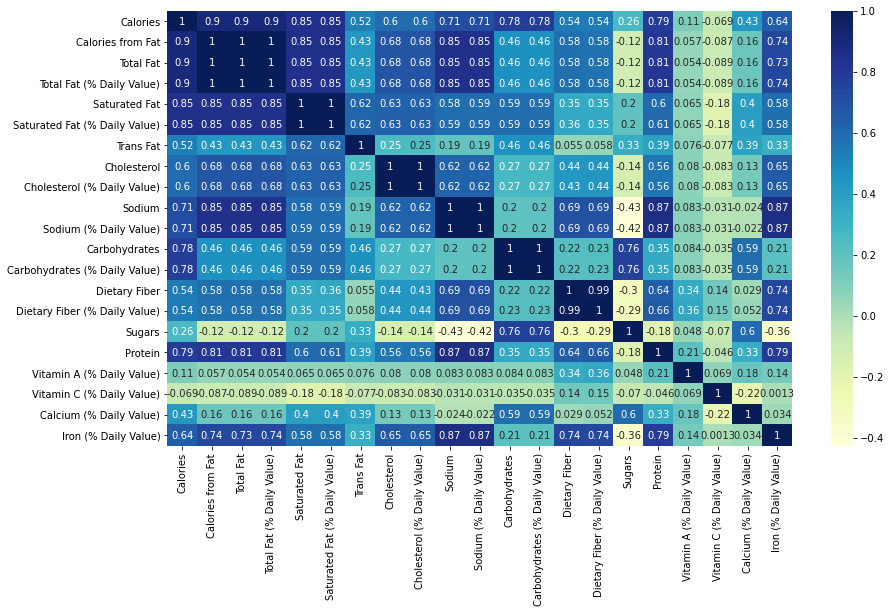

In [49]:
plt.figure(figsize=(14,8))
sns.heatmap(menu.corr(), annot=True, cmap='YlGnBu')

## How many calories does the average McDonald's value meal contain?

In [50]:
calories = menu.groupby('Category')['Calories'].mean()

calories.sort_values(ascending=False)

Category
Chicken & Fish        552.962963
Smoothies & Shakes    531.428571
Breakfast             526.666667
Beef & Pork           494.000000
Coffee & Tea          283.894737
Salads                270.000000
Snacks & Sides        245.769231
Desserts              222.142857
Beverages             113.703704
Name: Calories, dtype: float64

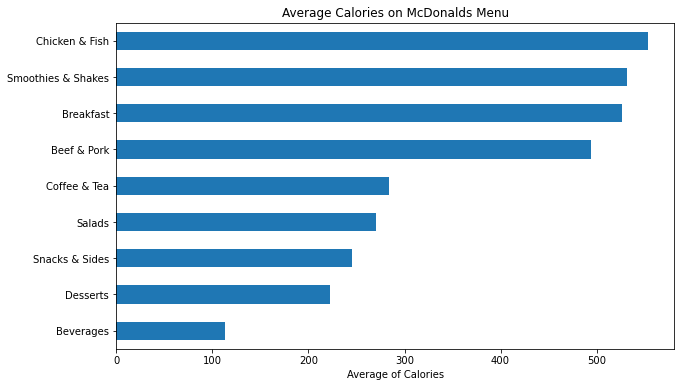

In [106]:
plt.figure(figsize=(10,6))
calories.sort_values().plot(kind='barh', title='Average Calories on McDonalds Menu')
plt.ylabel('')
plt.xlabel('Average of Calories')
plt.show()

## How much do beverages, like soda or coffee, contribute to the overall caloric intake?

In [57]:
list_soda = 'Coca-Cola Classic|Diet Coke|Dr Pepper|Sprite'
soda = menu[menu['Item'].str.contains(list_soda, case=False, regex=True)]
coffee = menu[menu['Item'].str.contains('Coffee')]
soda_coffee = pd.concat([soda,coffee])[['Item','Calories']]

# get overall calories (Daily Calories = 2000)
soda_coffee['Intake'] = soda_coffee['Calories']/2000 * 100
soda_coffee = soda_coffee.sort_values(by='Intake', ascending=False).reset_index(drop=True)
soda_coffee[:10]

,Item,Calories,Intake
0,Coca-Cola Classic (Large),280,14.0
1,Sprite (Large),280,14.0
2,Dr Pepper (Large),270,13.5
3,Regular Iced Coffee (Large),270,13.5
4,Caramel Iced Coffee (Large),260,13.0
5,Hazelnut Iced Coffee (Large),250,12.5
6,French Vanilla Iced Coffee (Large),240,12.0
7,Sprite (Medium),200,10.0
8,Coca-Cola Classic (Medium),200,10.0
9,Dr Pepper (Medium),190,9.5


## Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?

In [93]:
chickens = menu[menu['Category']=='Chicken & Fish']
chickens_df = chickens[['Item','Calories','Total Fat']]
chickens_df.loc[chickens_df['Item'].str.contains('Grilled Chicken'), 'Type'] = 'Grilled'
chickens_df.loc[chickens_df['Item'].str.contains('Crispy Chicken'), 'Type'] = 'Crispy'
chickens_df = chickens_df.dropna(subset=['Type'], axis=0)
chickens_df.sort_values('Type').reset_index(drop=True)

,Item,Calories,Total Fat,Type
0,Premium Crispy Chicken Classic Sandwich,510,22.0,Crispy
1,Premium McWrap Southwest Chicken (Crispy Chicken),670,33.0,Crispy
2,Premium McWrap Chicken & Ranch (Crispy Chicken),610,31.0,Crispy
3,Premium McWrap Chicken & Bacon (Crispy Chicken),630,32.0,Crispy
4,Premium McWrap Chicken Sweet Chili (Crispy Chi...,540,23.0,Crispy
5,Bacon Clubhouse Crispy Chicken Sandwich,750,38.0,Crispy
6,Southern Style Crispy Chicken Sandwich,430,19.0,Crispy
7,Premium Crispy Chicken Ranch BLT Sandwich,610,28.0,Crispy
8,Premium Crispy Chicken Club Sandwich,670,33.0,Crispy
9,Bacon Clubhouse Grilled Chicken Sandwich,590,25.0,Grilled


In [104]:
max_value = chickens_df.groupby('Type').max()
max_value

,Item,Calories,Total Fat
Type,,,
Crispy,Southern Style Crispy Chicken Sandwich,750,38.0
Grilled,Premium McWrap Southwest Chicken (Grilled Chic...,590,25.0


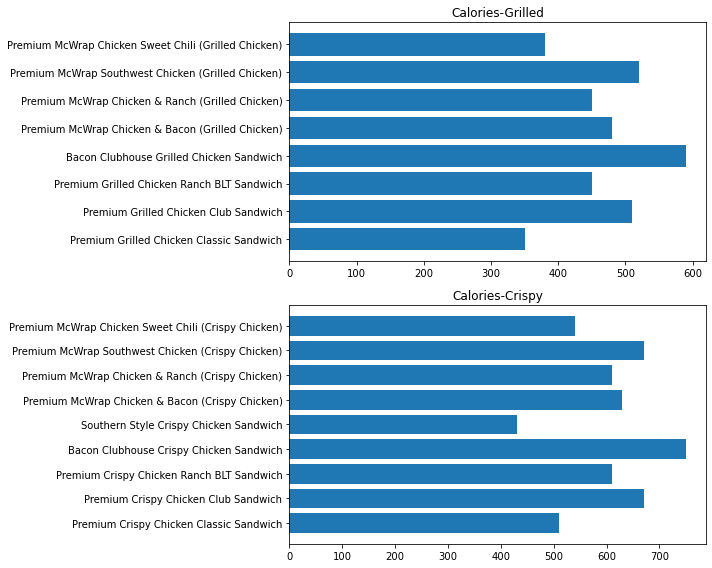

In [92]:
grilled = chickens_df[chickens_df['Type']=='Grilled']
crispy = chickens_df[chickens_df['Type']=='Crispy']

fig, ax = plt.subplots(2,1)
fig.set_size_inches(10,8)
ax[0].barh(grilled['Item'], grilled['Calories'])
ax[0].set_title('Calories-Grilled')
ax[1].barh(crispy['Item'], crispy['Calories'])
ax[1].set_title('Calories-Crispy')
# ax[1].barh(grilled['Item'], grilled['Total Fat'], label='Total Fat-Grilled')
# ax[3].barh(crispy['Item'], crispy['Total Fat'], label='Total Fat-Crispy')
plt.tight_layout()
plt.show()

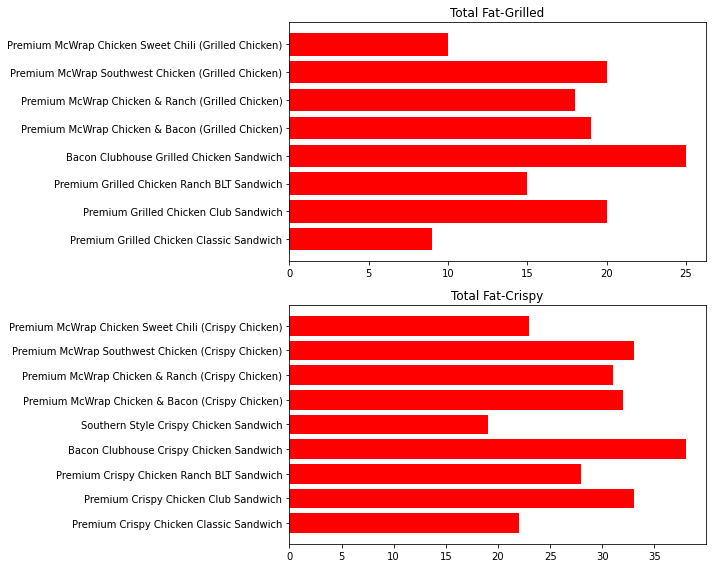

In [96]:
fig, ax = plt.subplots(2,1)
fig.set_size_inches(10,8)

ax[0].barh(grilled['Item'], grilled['Total Fat'], color='red', label='Total Fat-Grilled')
ax[0].set_title('Total Fat-Grilled')
ax[1].barh(crispy['Item'], crispy['Total Fat'], color='red', label='Total Fat-Crispy')
ax[1].set_title('Total Fat-Crispy')
plt.tight_layout()
plt.show()

## What about ordering egg whites instead of whole eggs?

In [110]:
eggs = menu[menu['Item'].str.contains('Egg')]
egg_whites = eggs[eggs['Item'].str.contains('Egg White')]

print(eggs.shape)
print(egg_whites.shape)

(25, 24)
(13, 24)


In [111]:
egg_whites_df = egg_whites[['Item','Calories','Carbohydrates','Protein']]
egg_whites_df.reset_index(drop=True, inplace=True)
egg_whites_df

,Item,Calories,Carbohydrates,Protein
0,Egg White Delight,250,30,18
1,Sausage McMuffin with Egg Whites,400,30,21
2,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",410,36,20
3,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",470,42,20
4,Sausage Biscuit with Egg Whites (Regular Biscuit),460,34,18
5,Sausage Biscuit with Egg Whites (Large Biscuit),520,40,18
6,"Bacon, Egg & Cheese McGriddles with Egg Whites",400,47,20
7,"Sausage, Egg & Cheese McGriddles with Egg Whites",500,46,21
8,"Bacon, Egg & Cheese Bagel with Egg Whites",570,55,30
9,Big Breakfast with Egg Whites (Regular Biscuit),640,50,26


## What is the least number of items could you order from the menu to meet one day's nutritional requirements?

Because every person has own historical health differently, so it's note easy to considerataion menu order.